In [115]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.model_selection import train_test_split

import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

In [116]:
message = pd.read_csv("complaint_data.csv")

In [117]:
message

Date received                                            Product  \
0          08/09/2015                                   Credit reporting   
1          12/23/2019                                       Student loan   
2          01/29/2019  Credit reporting, credit repair services, or o...   
3          08/19/2015                                           Mortgage   
4          03/04/2016                                        Credit card   
...               ...                                                ...   
1471761    01/29/2016                                           Mortgage   
1471762    11/27/2019                                    Debt collection   
1471763    05/07/2019                                           Mortgage   
1471764    07/18/2019                                           Mortgage   
1471765    11/13/2019                                       Student loan   

                                    Sub-product  \
0                                           NaN   
1                Federal student loan servicing   
2                              Credit reporting   
3        Conventional adjustable mortgage (ARM)   
4                                           NaN   
...                                         ...   
1471761             Conventional fixed mortgage   
1471762                              Other debt   
1471763              Conventional home mortgage   
1471764              Conventional home mortgage   
1471765          Federal student loan servicing   

                                                     Issue  \
0                   Incorrect information on credit report   
1                     Dealing with your lender or servicer   
2        Problem with a credit reporting company's inve...   
3                 Loan servicing, payments, escrow account   
4                                         Billing disputes   
...                                                    ...   
1471761           Application, originator, mortgage broker   
1471762                  Attempts to collect debt not owed   
1471763                         Struggling to pay mortgage   
1471764                              Closing on a mortgage   
1471765               Dealing with your lender or servicer   

                                                 Sub-issue  \
0                                  Information is not mine   
1              Trouble with how payments are being handled   
2        Was not notified of investigation status or re...   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1471761                                                NaN   
1471762                                      Debt was paid   
1471763                                                NaN   
1471764                                                NaN   
1471765        Trouble with how payments are being handled   

                              Consumer complaint narrative  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4        I am dissatisfied with the current outcome of ...   
...                                                    ...   
1471761                                                NaN   
1471762                                                NaN   
1471763  Hello, We were approved for a loan modificatio...   
1471764  I started the process to refinance my current ...   
1471765                                                NaN   

                                   Company public response  \
0         Company chooses not to provide a public response   
1                                                      NaN   
2                                                      NaN   

In [118]:
message=message.drop(['Date received','Consumer complaint narrative', 'Company public response', 'Company','ZIP code', 
       'Tags', 'Consumer consent provided?','Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],axis=1)

In [119]:
message

Product  \
0                                         Credit reporting   
1                                             Student loan   
2        Credit reporting, credit repair services, or o...   
3                                                 Mortgage   
4                                              Credit card   
...                                                    ...   
1471761                                           Mortgage   
1471762                                    Debt collection   
1471763                                           Mortgage   
1471764                                           Mortgage   
1471765                                       Student loan   

                                    Sub-product  \
0                                           NaN   
1                Federal student loan servicing   
2                              Credit reporting   
3        Conventional adjustable mortgage (ARM)   
4                                           NaN   
...                                         ...   
1471761             Conventional fixed mortgage   
1471762                              Other debt   
1471763              Conventional home mortgage   
1471764              Conventional home mortgage   
1471765          Federal student loan servicing   

                                                     Issue  \
0                   Incorrect information on credit report   
1                     Dealing with your lender or servicer   
2        Problem with a credit reporting company's inve...   
3                 Loan servicing, payments, escrow account   
4                                         Billing disputes   
...                                                    ...   
1471761           Application, originator, mortgage broker   
1471762                  Attempts to collect debt not owed   
1471763                         Struggling to pay mortgage   
1471764                              Closing on a mortgage   
1471765               Dealing with your lender or servicer   

                                                 Sub-issue State  
0                                  Information is not mine    NJ  
1              Trouble with how payments are being handled    MA  
2        Was not notified of investigation status or re...    NY  
3                                                      NaN    CA  
4                                                      NaN    NV  
...                                                    ...   ...  
1471761                                                NaN    CA  
1471762                                      Debt was paid    WI  
1471763                                                NaN    CA  
1471764                                                NaN    NC  
1471765        Trouble with how payments are being handled    IN  

[1471766 rows x 5 columns]

In [120]:
message.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue', 'State'], dtype='object')

In [121]:
message["Subject"]=message["Product"]
message["Email"]=message['Product'].fillna('') + '. ' + message['Sub-product'].fillna('') + '. ' + message['Issue'].fillna('') + '. ' + message['Sub-issue'].fillna('')

In [122]:
message

Product  \
0                                         Credit reporting   
1                                             Student loan   
2        Credit reporting, credit repair services, or o...   
3                                                 Mortgage   
4                                              Credit card   
...                                                    ...   
1471761                                           Mortgage   
1471762                                    Debt collection   
1471763                                           Mortgage   
1471764                                           Mortgage   
1471765                                       Student loan   

                                    Sub-product  \
0                                           NaN   
1                Federal student loan servicing   
2                              Credit reporting   
3        Conventional adjustable mortgage (ARM)   
4                                           NaN   
...                                         ...   
1471761             Conventional fixed mortgage   
1471762                              Other debt   
1471763              Conventional home mortgage   
1471764              Conventional home mortgage   
1471765          Federal student loan servicing   

                                                     Issue  \
0                   Incorrect information on credit report   
1                     Dealing with your lender or servicer   
2        Problem with a credit reporting company's inve...   
3                 Loan servicing, payments, escrow account   
4                                         Billing disputes   
...                                                    ...   
1471761           Application, originator, mortgage broker   
1471762                  Attempts to collect debt not owed   
1471763                         Struggling to pay mortgage   
1471764                              Closing on a mortgage   
1471765               Dealing with your lender or servicer   

                                                 Sub-issue State  \
0                                  Information is not mine    NJ   
1              Trouble with how payments are being handled    MA   
2        Was not notified of investigation status or re...    NY   
3                                                      NaN    CA   
4                                                      NaN    NV   
...                                                    ...   ...   
1471761                                                NaN    CA   
1471762                                      Debt was paid    WI   
1471763                                                NaN    CA   
1471764                                                NaN    NC   
1471765        Trouble with how payments are being handled    IN   

                                                   Subject  \
0                                         Credit reporting   
1                                             Student loan   
2        Credit reporting, credit repair services, or o...   
3                                                 Mortgage   
4                                              Credit card   
...                                                    ...   
1471761                                           Mortgage   
1471762                                    Debt collection   
1471763                                           Mortgage   
1471764                                           Mortgage   
1471765                                       Student loan   

                                                     Email  
0        Credit reporting. . Incorrect information on c...  
1        Student loan. Federal student loan servicing. ...  
2        Credit reporting, credit repair services, or o...  
3        Mortgage. Conventional adjustable mortgage (AR...  
4                        Credit card. . Billing disputes.   
...                 

In [123]:
message['Subject'] = message['Subject'].str.split(', ')
message = message.explode('Subject')
message.reset_index(drop=True, inplace=True)
message['Subject'] = message['Subject'].str.lower()
message['Subject'] = message['Subject'].apply(lambda x: x.replace('or ', '') if x.startswith('or ') else x)

In [124]:
message.head()

Product  \
0                                   Credit reporting   
1                                       Student loan   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                      Sub-product  \
0                             NaN   
1  Federal student loan servicing   
2                Credit reporting   
3                Credit reporting   
4                Credit reporting   

                                               Issue  \
0             Incorrect information on credit report   
1               Dealing with your lender or servicer   
2  Problem with a credit reporting company's inve...   
3  Problem with a credit reporting company's inve...   
4  Problem with a credit reporting company's inve...   

                                           Sub-issue State  \
0                            Information is not mine    NJ   
1        Trouble with how payments are being handled    MA   
2  Was not notified of investigation status or re...    NY   
3  Was not notified of investigation status or re...    NY   
4  Was not notified of investigation status or re...    NY   

                           Subject  \
0                 credit reporting   
1                     student loan   
2                 credit reporting   
3           credit repair services   
4  other personal consumer reports   

                                               Email  
0  Credit reporting. . Incorrect information on c...  
1  Student loan. Federal student loan servicing. ...  
2  Credit reporting, credit repair services, or o...  
3  Credit reporting, credit repair services, or o...  
4  Credit reporting, credit repair services, or o...

In [125]:

department_mapping = {
    'credit reporting': 'Credit Department',
    'student loan': 'Loan Department',
    'credit repair services': 'Credit Department',
    'other personal consumer reports': 'Consumer Department',
    'mortgage': 'Loan Department',
    'credit card': 'Credit Department',
    'debt collection': 'Collections Department',
    'bank account or service': 'Banking Department',
    'credit card or prepaid card': 'Credit Department',
    'vehicle loan or lease': 'Loan Department',
    'money transfer': 'Money Transfer Department',
    'virtual currency': 'Crypto Department',
    'money service': 'Money Transfer Department',
    'checking or savings account': 'Banking Department',
    'money transfers': 'Money Transfer Department',
    'payday loan': 'Loan Department',
    'title loan': 'Loan Department',
    'personal loan': 'Loan Department',
    'prepaid card': 'Credit Department',
    'consumer loan': 'Loan Department',
    'other financial service': 'Other Department'
}



# Map issues to departments using the mapping dictionary
message['Department'] = message['Subject'].map(department_mapping)

In [126]:
message

Product  \
0                                         Credit reporting   
1                                             Student loan   
2        Credit reporting, credit repair services, or o...   
3        Credit reporting, credit repair services, or o...   
4        Credit reporting, credit repair services, or o...   
...                                                    ...   
2168093                                           Mortgage   
2168094                                    Debt collection   
2168095                                           Mortgage   
2168096                                           Mortgage   
2168097                                       Student loan   

                            Sub-product  \
0                                   NaN   
1        Federal student loan servicing   
2                      Credit reporting   
3                      Credit reporting   
4                      Credit reporting   
...                                 ...   
2168093     Conventional fixed mortgage   
2168094                      Other debt   
2168095      Conventional home mortgage   
2168096      Conventional home mortgage   
2168097  Federal student loan servicing   

                                                     Issue  \
0                   Incorrect information on credit report   
1                     Dealing with your lender or servicer   
2        Problem with a credit reporting company's inve...   
3        Problem with a credit reporting company's inve...   
4        Problem with a credit reporting company's inve...   
...                                                    ...   
2168093           Application, originator, mortgage broker   
2168094                  Attempts to collect debt not owed   
2168095                         Struggling to pay mortgage   
2168096                              Closing on a mortgage   
2168097               Dealing with your lender or servicer   

                                                 Sub-issue State  \
0                                  Information is not mine    NJ   
1              Trouble with how payments are being handled    MA   
2        Was not notified of investigation status or re...    NY   
3        Was not notified of investigation status or re...    NY   
4        Was not notified of investigation status or re...    NY   
...                                                    ...   ...   
2168093                                                NaN    CA   
2168094                                      Debt was paid    WI   
2168095                                                NaN    CA   
2168096                                                NaN    NC   
2168097        Trouble with how payments are being handled    IN   

                                 Subject  \
0                       credit reporting   
1                           student loan   
2                       credit reporting   
3                 credit repair services   
4        other personal consumer reports   
...                                  ...   
2168093                         mortgage   
2168094                  debt collection   
2168095                         mortgage   
2168096                         mortgage   
2168097                     student loan   

                                                     Email  \
0        Credit reporting. . Incorrect information on c...   
1        Student loan. Federal student loan servicing. ...   
2        Credit reporting, credit repair services, or o...   
3        Credit reporting, credit repair services, or o...   
4        Credit reporting, credit repair services, or o...   
...                                                    ...   
2168093  Mortgage. Conventional fixed mortgage. Applica...   
2168094  Debt collection. Other debt. Attempts to colle...   
2168095  Mortgage. Conventional home mortgage. Struggli...   
2168096  Mortgage. Conventional home mortgage. Closing ...   
2168097  Student

In [127]:
message=message.drop(['Product', 'Sub-product', 'Issue', 'Sub-issue', 'State'],axis=1)

In [128]:
message

Subject  \
0                       credit reporting   
1                           student loan   
2                       credit reporting   
3                 credit repair services   
4        other personal consumer reports   
...                                  ...   
2168093                         mortgage   
2168094                  debt collection   
2168095                         mortgage   
2168096                         mortgage   
2168097                     student loan   

                                                     Email  \
0        Credit reporting. . Incorrect information on c...   
1        Student loan. Federal student loan servicing. ...   
2        Credit reporting, credit repair services, or o...   
3        Credit reporting, credit repair services, or o...   
4        Credit reporting, credit repair services, or o...   
...                                                    ...   
2168093  Mortgage. Conventional fixed mortgage. Applica...   
2168094  Debt collection. Other debt. Attempts to colle...   
2168095  Mortgage. Conventional home mortgage. Struggli...   
2168096  Mortgage. Conventional home mortgage. Closing ...   
2168097  Student loan. Federal student loan servicing. ...   

                     Department  
0             Credit Department  
1               Loan Department  
2             Credit Department  
3             Credit Department  
4           Consumer Department  
...                         ...  
2168093         Loan Department  
2168094  Collections Department  
2168095         Loan Department  
2168096         Loan Department  
2168097         Loan Department  

[2168098 rows x 3 columns]

In [129]:
message.to_csv("Email_data.csv",index=False)

In [ ]:
#!pip install --upgrade tensorflow_hub

In [137]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [131]:
emails_data=pd.read_csv("Email_data.csv")
emails_data.sample(10)

Subject  \
1325077                 credit reporting   
62341    other personal consumer reports   
246761            credit repair services   
1759127  other personal consumer reports   
668044                          mortgage   
450345           bank account or service   
42625    other personal consumer reports   
19732                           mortgage   
1906968                 credit reporting   
1757240           credit repair services   

                                                     Email  \
1325077  Credit reporting, credit repair services, or o...   
62341    Credit reporting, credit repair services, or o...   
246761   Credit reporting, credit repair services, or o...   
1759127  Credit reporting, credit repair services, or o...   
668044   Mortgage. VA mortgage. Loan modification,colle...   
450345   Bank account or service. Checking account. Mak...   
42625    Credit reporting, credit repair services, or o...   
19732    Mortgage. VA mortgage. Loan servicing, payment...   
1906968  Credit reporting, credit repair services, or o...   
1757240  Credit reporting, credit repair services, or o...   

                  Department  
1325077    Credit Department  
62341    Consumer Department  
246761     Credit Department  
1759127  Consumer Department  
668044       Loan Department  
450345    Banking Department  
42625    Consumer Department  
19732        Loan Department  
1906968    Credit Department  
1757240    Credit Department

In [132]:
emails_data.groupby('Department').describe()

Subject                                          \
                            count unique                              top   
Department                                                                  
Banking Department         141658      2          bank account or service   
Collections Department     275584      1                  debt collection   
Consumer Department        322817      1  other personal consumer reports   
Credit Department          944345      5                 credit reporting   
Crypto Department           13760      1                 virtual currency   
Loan Department            436037      7                         mortgage   
Money Transfer Department   32838      3                   money transfer   
Other Department             1059      1          other financial service   

                                    Email         \
                             freq   count unique   
Department                                         
Banking Department          86206  141658    169   
Collections Department     275584  275584    469   
Consumer Department        322817  322817     57   
Credit Department          463249  944345    358   
Crypto Department           13760   13760     68   
Loan Department            293191  436037    450   
Money Transfer Department   13742   32838     75   
Other Department             1059    1059     45   

                                                                              \
                                                                         top   
Department                                                                     
Banking Department         Bank account or service. Checking account. Acc...   
Collections Department     Debt collection. Other (i.e. phone, health clu...   
Consumer Department        Credit reporting, credit repair services, or o...   
Credit Department          Credit reporting, credit repair services, or o...   
Crypto Department          Money transfer, virtual currency, or money ser...   
Loan Department            Mortgage. Other mortgage. Loan modification,co...   
Money Transfer Department  Money transfer, virtual currency, or money ser...   
Other Department           Other financial service. Debt settlement. Frau...   

                                   
                             freq  
Department                         
Banking Department          22261  
Collections Department      12548  
Consumer Department         98970  
Credit Department          197940  
Crypto Department            1447  
Loan Department             50683  
Money Transfer Department    2894  
Other Department              166

In [133]:
emails_data['Department'].value_counts()

Credit Department            944345
Loan Department              436037
Consumer Department          322817
Collections Department       275584
Banking Department           141658
Money Transfer Department     32838
Crypto Department             13760
Other Department               1059
Name: Department, dtype: int64

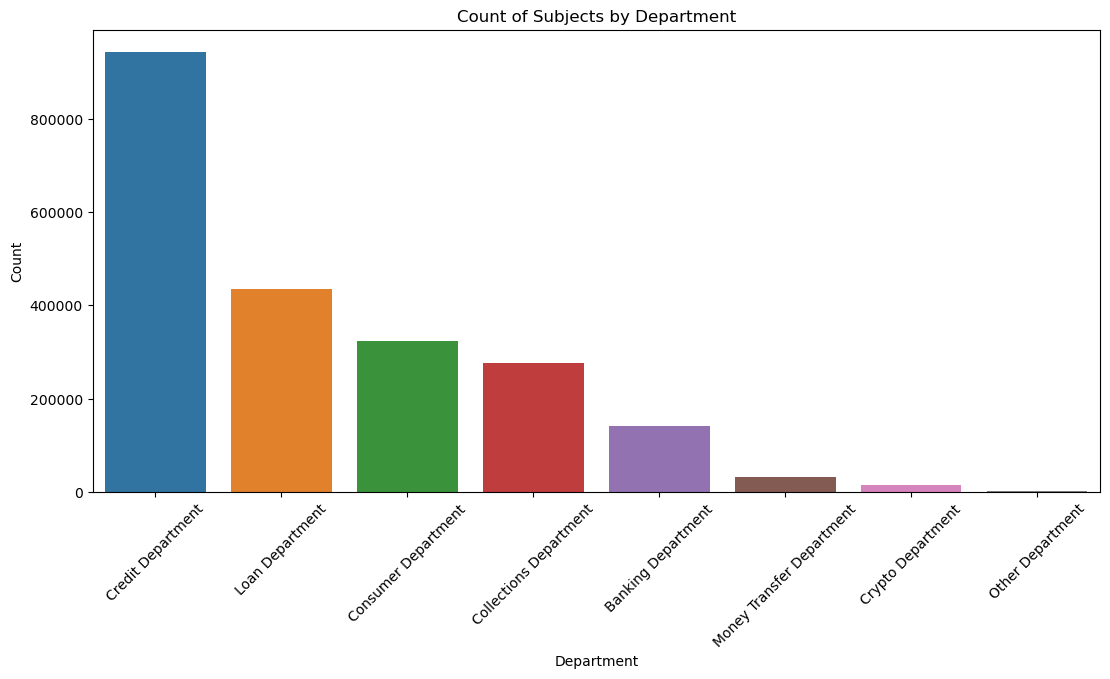

In [143]:
plt.figure(figsize=(13, 6))
sns.countplot(data=emails_data, x='Department')
plt.title('Count of Subjects by Department')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

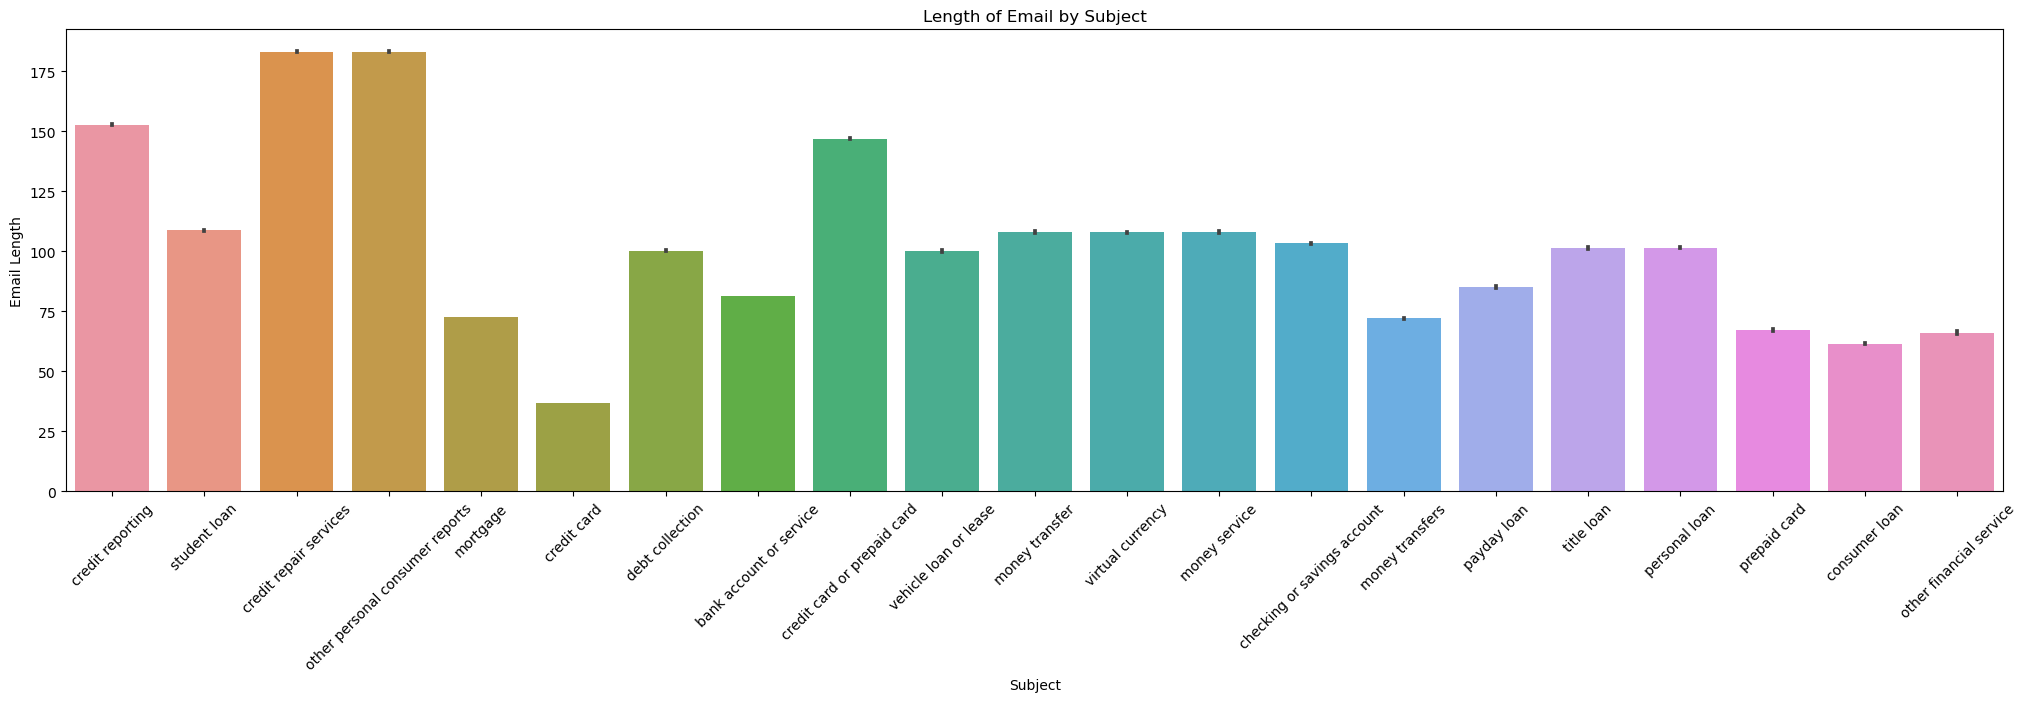

In [144]:
emails_data['Email_length'] = emails_data['Email'].apply(len)
plt.figure(figsize=(25, 6))
sns.barplot(data=emails_data, x='Subject', y='Email_length')
plt.title('Length of Email by Subject')
plt.xlabel('Subject')
plt.ylabel('Email Length')
plt.xticks(rotation=45)
plt.show()

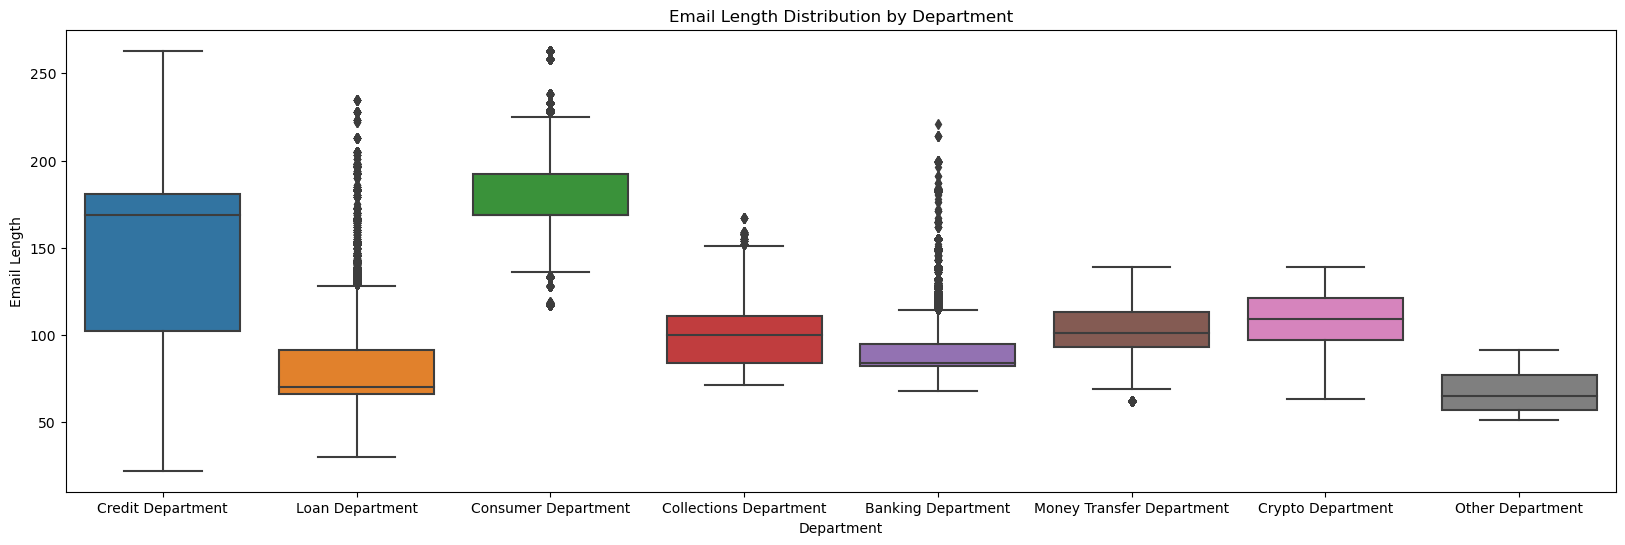

In [147]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=emails_data, x='Department', y='Email_length')
plt.title('Email Length Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Email Length')
plt.show()

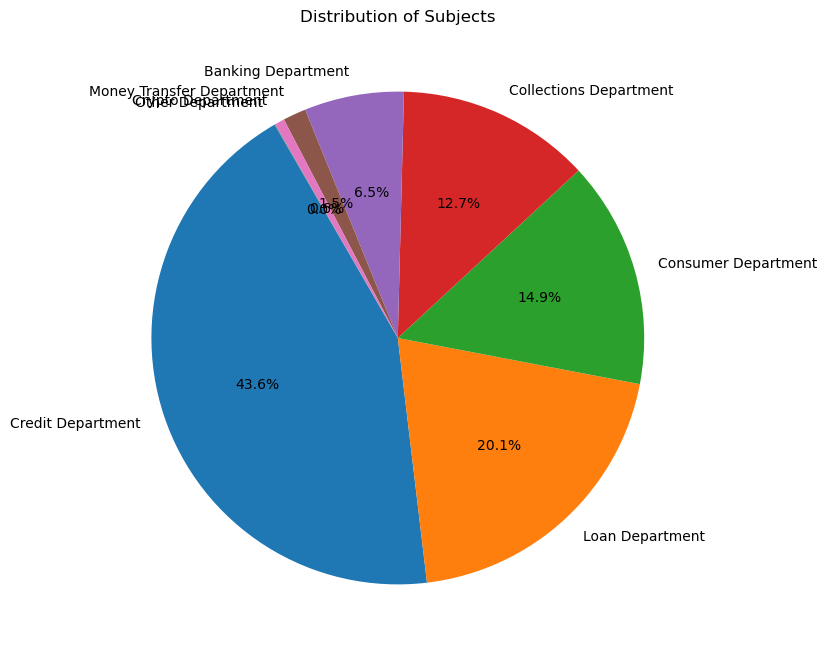

In [164]:
subject_counts = emails_data['Department'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%0.1f%%', startangle=120)
plt.title('Distribution of Subjects')
plt.show()

In [167]:
X_train, X_test, y_train, y_test = train_test_split( emails_data['Email'],emails_data['Department'], stratify=emails_data['Department'])

In [178]:
X_train

1326680    Credit reporting, credit repair services, or o...
2091939    Credit reporting, credit repair services, or o...
1627070    Credit reporting, credit repair services, or o...
617921     Payday loan, title loan, or personal loan. Ins...
613318                             Credit card. . Late fee. 
                                 ...                        
505870     Student loan. Non-federal student loan. Repayi...
348547     Debt collection. Other (i.e. phone, health clu...
612477     Debt collection. Federal student loan. Imprope...
1927353    Credit reporting, credit repair services, or o...
1339653    Credit reporting, credit repair services, or o...
Name: Email, Length: 1626073, dtype: object

In [181]:
y_train

1326680       Consumer Department
2091939       Consumer Department
1627070       Consumer Department
617921            Loan Department
613318          Credit Department
                    ...          
505870            Loan Department
348547     Collections Department
612477     Collections Department
1927353         Credit Department
1339653         Credit Department
Name: Department, Length: 1626073, dtype: object

In [182]:
y_train.unique()

array(['Consumer Department', 'Loan Department', 'Credit Department',
       'Collections Department', 'Banking Department',
       'Money Transfer Department', 'Crypto Department',
       'Other Department'], dtype=object)

In [ ]:
# Load pre-trained BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text data
tokenized_inputs = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='tf')

# Encode labels (Department)
label_map = {label: idx for idx, label in enumerate(y_train.unique())}
y_train_new = y_train.map(label_map)


In [ ]:
# Build BERT-based classification model
input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32)
outputs = bert_model(input_ids)[0]
pooled_output = tf.keras.layers.GlobalAveragePooling1D()(outputs)
dense_layer = tf.keras.layers.Dense(len(label_map), activation='softmax')(pooled_output)

model = tf.keras.Model(inputs=input_ids, outputs=dense_layer)
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(tokenized_inputs['input_ids'], y_train_new, epochs=5, batch_size=32)